What this notebook will do: 
(1) pull csv files for data in resources folder 
(2) clean up df from csv file
(3) plot data
(4) summarize data stats

In [3]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [81]:
# Read in census data

census_1 = pd.read_csv('SeriesReport-202101160825.csv', thousands=',')
census_1.head(10)

,Unnamed: 0,Unnamed: 1,U.S. Census Bureau,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,Source: Monthly Retail Trade and Food Services,NaN,NaN,NaN
1,NaN,NaN,4451: Grocery Stores: U.S. Total,NaN,NaN,NaN
2,NaN,NaN,Seasonally Adjusted Sales - Monthly [Millions ...,NaN,NaN,NaN
3,NaN,NaN,Period: 2017 to 2021,NaN,NaN,NaN
4,NaN,NaN,"Data Extracted on: January 16, 2021 (8:25 am)",NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,Period,Value,NaN,NaN,NaN,NaN
7,Jan-2017,"52,860",NaN,NaN,NaN,NaN
8,Feb-2017,"53,164",NaN,NaN,NaN,NaN
9,Mar-2017,"53,647",NaN,NaN,NaN,NaN


In [89]:
# clean up census data
# pull out heading info
origin = census_1.iloc[0]['U.S. Census Bureau']
data_type = census_1.iloc[1]['U.S. Census Bureau']
data_unit = census_1.iloc[2]['U.S. Census Bureau']
data_time = census_1.iloc[3]['U.S. Census Bureau']

# print data description and new df heading
print(f'{origin}')
print(f'Data type is {data_type}')
print(f'Data unit is {data_unit}')
print(f'Data timeframe is {data_time}')

# delete columns 3-6
census_2 = census_1.drop(columns=['U.S. Census Bureau', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'])

# delete rows 0-6
census_3 = census_2.drop([0, 1, 2, 3, 4, 5, 6])

# rename columns 1 and 2 to Period and Value (millions of dollars)
census = census_3.rename(columns={"Unnamed: 0": "Period", "Unnamed: 1": "Value (millions of dollars)"})

census.head(10)

Source: Monthly Retail Trade and Food Services
Data type is 4451: Grocery Stores: U.S. Total
Data unit is Seasonally Adjusted Sales - Monthly [Millions of Dollars]
Data timeframe is Period: 2017 to 2021


,Period,Value (millions of dollars)
7,Jan-2017,"52,860"
8,Feb-2017,"53,164"
9,Mar-2017,"53,647"
10,Apr-2017,"53,728"
11,May-2017,"53,850"
12,Jun-2017,"53,689"
13,Jul-2017,"53,790"
14,Aug-2017,"53,981"
15,Sep-2017,"54,630"
16,Oct-2017,"54,773"


In [83]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65528 entries, 7 to 65534
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Period                       60 non-null     object
 1   Value (millions of dollars)  47 non-null     object
dtypes: object(2)
memory usage: 1.5+ MB


In [90]:
census['Value (millions of dollars)'] = census['Value (millions of dollars)'].str.replace(',', '').astype('int64')

ValueError: cannot convert float NaN to integer

In [87]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65528 entries, 7 to 65534
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Period                       60 non-null     object 
 1   Value (millions of dollars)  47 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ MB


TypeError: 'value' must be an instance of str or bytes, not a float

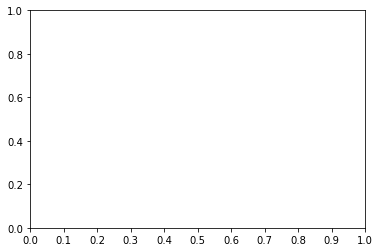

In [86]:
# plot of census data
period = census['Period']
value = census['Value (millions of dollars)']

#x = trends['Search Week']
#y = trends['US search term: recipe (%)']

  
f = plt.figure() 
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.plot(period, value) 
f.set_figwidth(12) 
f.set_figheight(8)

plt.show() 

In [76]:
# Read in google trends data
trends_1 = pd.read_csv('multiTimeline.csv')

# rename columns
trends = trends_1.rename(columns={"Week": "Search Week", "recipe: (United States)": "US search term: recipe (%)", 
                                  "grocery: (United States)": "US search term: grocery (%)",
                                 "delivery: (United States)": "US search term: delivery (%)",
                                 "hours: (United States)": "US search term: hours (%)"})
trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Search Week                   261 non-null    object
 1   US search term: recipe (%)    261 non-null    int64 
 2   US search term: grocery (%)   261 non-null    int64 
 3   US search term: delivery (%)  261 non-null    int64 
 4   US search term: hours (%)     261 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 10.3+ KB


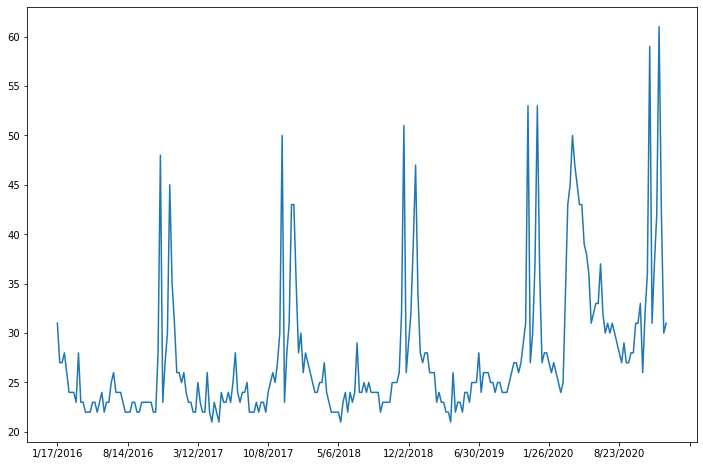

In [71]:
import matplotlib.ticker as ticker
# scatter plot of google trends data
x = trends['Search Week']
y = trends['US search term: recipe (%)']

  
f = plt.figure() 
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.plot(x, y) 
f.set_figwidth(12) 
f.set_figheight(8)

plt.show() 


#plt.scatter(week, percentage)
#plt.title("Percentage Google Search of RECIPE in the US vs. Week ")
#plt.xlabel("Week")
#plt.ylabel("U.S. Google Search term = RECIPE (%)")
#plt.show()

In [31]:
# Read in covid data
covid = pd.read_csv('Resources/covid/national-history.csv')

covid.head()

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease
0,1/15/2021,383130.0,3679,39626.0,23593.0,4000,127235.0,750650.0,212245495.0,1592990,3845.0,7772.0,23226923.0,243996,56,278054836,2279606
1,1/14/2021,379451.0,3915,39418.0,23891.0,3792,128947.0,746650.0,210652505.0,1342237,3829.0,7878.0,22982927.0,222944,56,275775230,2010144
2,1/13/2021,375536.0,4087,39248.0,23857.0,5312,130391.0,742858.0,209310268.0,1238061,3811.0,7902.0,22759983.0,221557,56,273765086,1804256
3,1/12/2021,371449.0,4064,39049.0,23881.0,4657,131326.0,737546.0,208072207.0,1415810,3796.0,7879.0,22538426.0,214809,56,271960830,1924459
4,1/11/2021,367385.0,1733,38823.0,23501.0,3045,129793.0,732889.0,206656397.0,1384476,3773.0,7786.0,22323617.0,194140,56,270036371,1843844


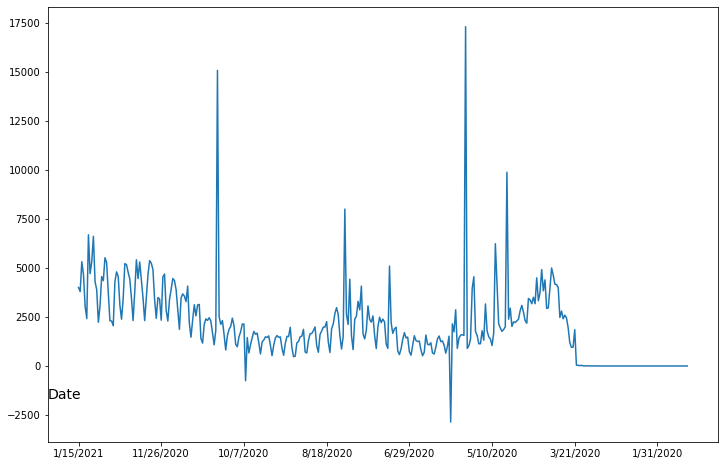

In [73]:
# scatter plot of covid data
date = covid['date']
increase = covid['hospitalizedIncrease']

#plt.scatter(date, increase)
#plt.title("U.S. daily increase in covid hospitalizations")
#plt.xlabel("Date")
#plt.ylabel("Number of hospitalizations increased from previous day")

f = plt.figure() 
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.text(0.0, 0.1, "Date", fontsize=14, transform=ax.transAxes)
plt.plot(date, increase) 
f.set_figwidth(12) 
f.set_figheight(8)

plt.show()

In [ ]:
# Characterize the data set using matplotlib and stats.normaltest
plt.hist(temperatures)
plt.xlabel('Temperature (°F)')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(temperatures.sample(50)))

In [ ]:
# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(temperatures,ddof = 0)
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(temperatures,ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

In [ ]:
# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")

In [ ]:
# Demonstrate calculating the z-scores using SciPy
z_scipy = sts.zscore(temperatures)
print(f"The z-scores using the SciPy module are {z_scipy}")